In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
%matplotlib inline
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
import matplotlib.pylab as plt
# https://docs.scipy.org/doc/numpy/reference/routines.math.html
import numpy as np

In [4]:
from distutils.version import StrictVersion

In [5]:
import sklearn

assert StrictVersion(sklearn.__version__ ) >= StrictVersion('0.18.1')

sklearn.__version__

'0.18.1'

In [6]:
import tensorflow as tf
tf.logging.set_verbosity(tf.logging.ERROR)

assert StrictVersion(tf.__version__) >= StrictVersion('1.1.0')

tf.__version__

'1.1.0'

In [7]:
import keras

assert StrictVersion(keras.__version__) >= StrictVersion('2.0.0')

keras.__version__

Using TensorFlow backend.


'2.0.4'

In [23]:
!curl -O https://raw.githubusercontent.com/DJCordhose/speed-limit-signs/master/data/speed-limit-signs.zip
    

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 1810k  100 1810k    0     0  3251k      0 --:--:-- --:--:-- --:--:-- 3255k


In [24]:
# https://docs.python.org/3/library/zipfile.html
from zipfile import ZipFile
zip = ZipFile(r'speed-limit-signs.zip')
zip.extractall('.')

In [25]:
!ls -l speed-limit-signs

total 28
drwxr-xr-x 2 nbuser nbuser 4096 Jul  3 14:15 0
drwxr-xr-x 2 nbuser nbuser 4096 Jul  3 14:15 1
drwxr-xr-x 2 nbuser nbuser 4096 Jul  3 14:15 2
drwxr-xr-x 2 nbuser nbuser 4096 Jul  3 14:15 3
drwxr-xr-x 2 nbuser nbuser 4096 Jul  3 14:15 4
drwxr-xr-x 2 nbuser nbuser 4096 Jul  3 14:15 5
-rw-r--r-- 1 nbuser nbuser  380 Jul  3 14:33 README.md


In [26]:
!cat speed-limit-signs/README.md

Data extracted from http://benchmark.ini.rub.de/?section=gtsdb&subsection=dataset

From http://benchmark.ini.rub.de/Dataset_GTSDB/FullIJCNN2013.zip just the samples for the speed limit signs 

## Format

https://en.wikipedia.org/wiki/Netpbm_format

Can be previewed on a Mac and be processed by http://scikit-image.org/

## Labels
- 0: 30
- 1: 50
- 2: 70
- 3: 80
- 4: 100
- 5: 120

In [27]:
!ls speed-limit-signs/0

00000.ppm  00012.ppm  00024.ppm  00036.ppm  00048.ppm  00060.ppm  00072.ppm
00001.ppm  00013.ppm  00025.ppm  00037.ppm  00049.ppm  00061.ppm  00073.ppm
00002.ppm  00014.ppm  00026.ppm  00038.ppm  00050.ppm  00062.ppm  00074.ppm
00003.ppm  00015.ppm  00027.ppm  00039.ppm  00051.ppm  00063.ppm  00075.ppm
00004.ppm  00016.ppm  00028.ppm  00040.ppm  00052.ppm  00064.ppm  00076.ppm
00005.ppm  00017.ppm  00029.ppm  00041.ppm  00053.ppm  00065.ppm  00077.ppm
00006.ppm  00018.ppm  00030.ppm  00042.ppm  00054.ppm  00066.ppm  00078.ppm
00007.ppm  00019.ppm  00031.ppm  00043.ppm  00055.ppm  00067.ppm
00008.ppm  00020.ppm  00032.ppm  00044.ppm  00056.ppm  00068.ppm
00009.ppm  00021.ppm  00033.ppm  00045.ppm  00057.ppm  00069.ppm
00010.ppm  00022.ppm  00034.ppm  00046.ppm  00058.ppm  00070.ppm
00011.ppm  00023.ppm  00035.ppm  00047.ppm  00059.ppm  00071.ppm


In [28]:
import os
import skimage.data

def load_data(data_dir):
    """Loads a data set and returns two lists:
    
    images: a list of Numpy arrays, each representing an image.
    labels: a list of numbers that represent the images labels.
    """
    # Get all subdirectories of data_dir. Each represents a label.
    directories = [d for d in os.listdir(data_dir) 
                   if os.path.isdir(os.path.join(data_dir, d))]
    # Loop through the label directories and collect the data in
    # two lists, labels and images.
    labels = []
    images = []
    for d in directories:
        label_dir = os.path.join(data_dir, d)
        file_names = [os.path.join(label_dir, f) 
                      for f in os.listdir(label_dir) if f.endswith(".ppm")]
        # For each label, load it's images and add them to the images list.
        # And add the label number (i.e. directory name) to the labels list.
        for f in file_names:
            images.append(skimage.data.imread(f))
            labels.append(int(d))
    return images, labels

In [29]:
# Load datasets.
ROOT_PATH = "./"
data_dir = os.path.join(ROOT_PATH, "speed-limit-signs")

images, labels = load_data(data_dir)

In [30]:
import matplotlib
import matplotlib.pyplot as plt

def display_images_and_labels(images, labels):
    """Display the first image of each label."""
    unique_labels = set(labels)
    plt.figure(figsize=(15, 15))
    i = 1
    for label in unique_labels:
        # Pick the first image for each label.
        image = images[labels.index(label)]
        plt.subplot(8, 8, i)  # A grid of 8 rows x 8 columns
        plt.axis('off')
        plt.title("Label {0} ({1})".format(label, labels.count(label)))
        i += 1
        _ = plt.imshow(image)
    plt.show()

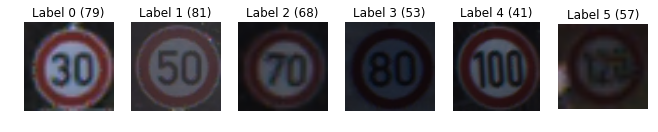

In [31]:
display_images_and_labels(images, labels)

In [32]:
for image in images[:5]:
    print("shape: {0}, min: {1}, max: {2}".format(image.shape, image.min(), image.max()))

shape: (20, 21, 3), min: 8, max: 130
shape: (50, 50, 3), min: 11, max: 139
shape: (43, 45, 3), min: 10, max: 149
shape: (65, 65, 3), min: 5, max: 170
shape: (30, 30, 3), min: 6, max: 155


In [33]:
import skimage.transform

# Resize images
images64 = [skimage.transform.resize(image, (64, 64))
                for image in images]

In [34]:
for image in images64[:5]:
    print("shape: {0}, min: {1}, max: {2}".format(image.shape, image.min(), image.max()))

shape: (64, 64, 3), min: 0.04015203737745093, max: 0.5032676547181382
shape: (64, 64, 3), min: 0.045677274816176325, max: 0.5281192555147057
shape: (64, 64, 3), min: 0.0392156862745098, max: 0.5779991000306375
shape: (64, 64, 3), min: 0.030235380284926498, max: 0.6628334195006125
shape: (64, 64, 3), min: 0.0327349494485292, max: 0.5970368030024512


In [35]:
import numpy as np

y = np.array(labels)
X = np.array(images64)
y.shape, X.shape

((379,), (379, 64, 64, 3))

In [36]:
from keras.utils.np_utils import to_categorical

num_categories = 6

y = to_categorical(y, num_categories)

## Zuerst testen wir unser Modell, ob wir es überhaupt trainiert bekommen, indem wir auf einer kleinen Menge von Daten overfitten

In [37]:
from sklearn.model_selection import train_test_split

In [56]:
# http://cs231n.github.io/neural-networks-3/#sanitycheck
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.95, random_state=23)

In [39]:
# (0.5 % of ~400 = ~20)
X_train.shape, y_train.shape

((18, 64, 64, 3), (18, 6))

In [40]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [48]:
model.fit(X_train, y_train, epochs=50, batch_size=100, validation_split=0.3)

Train on 12 samples, validate on 6 samples
Epoch 1/50
12/12 [==============================] - 0s - loss: 8.0610 - acc: 0.5000 - val_loss: 6.2082 - val_acc: 0.3333
Epoch 2/50
12/12 [==============================] - 0s - loss: 8.0609 - acc: 0.5000 - val_loss: 6.2923 - val_acc: 0.3333
Epoch 3/50
12/12 [==============================] - 0s - loss: 8.0607 - acc: 0.5000 - val_loss: 6.3822 - val_acc: 0.3333
Epoch 4/50
12/12 [==============================] - 0s - loss: 8.0606 - acc: 0.5000 - val_loss: 6.4741 - val_acc: 0.3333
Epoch 5/50
12/12 [==============================] - 0s - loss: 8.0605 - acc: 0.5000 - val_loss: 6.5663 - val_acc: 0.3333
Epoch 6/50
12/12 [==============================] - 0s - loss: 8.0604 - acc: 0.5000 - val_loss: 6.6579 - val_acc: 0.3333
Epoch 7/50
12/12 [==============================] - 0s - loss: 8.0603 - acc: 0.5000 - val_loss: 6.7486 - val_acc: 0.3333
Epoch 8/50
12/12 [==============================] - 0s - loss: 8.0602 - acc: 0.5000 - val_loss: 6.8381 - val_a

In [49]:
inputs = Input(shape=(64, 64, 3))
flattened = Flatten()(inputs)
hidden = Dense(1024, activation='relu')(flattened)
softmax = Dense(6, activation='softmax')(hidden)

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [52]:
model.fit(X_train, y_train, epochs=50, batch_size=100, validation_split=0.3)

Train on 12 samples, validate on 6 samples
Epoch 1/50
12/12 [==============================] - 0s - loss: 6.7159 - acc: 0.5833 - val_loss: 9.0751 - val_acc: 0.3333
Epoch 2/50
12/12 [==============================] - 0s - loss: 6.7159 - acc: 0.5833 - val_loss: 9.1005 - val_acc: 0.3333
Epoch 3/50
12/12 [==============================] - 0s - loss: 6.7159 - acc: 0.5833 - val_loss: 9.1262 - val_acc: 0.3333
Epoch 4/50
12/12 [==============================] - 0s - loss: 6.7159 - acc: 0.5833 - val_loss: 9.1517 - val_acc: 0.3333
Epoch 5/50
12/12 [==============================] - 0s - loss: 6.7159 - acc: 0.5833 - val_loss: 9.1776 - val_acc: 0.3333
Epoch 6/50
12/12 [==============================] - 0s - loss: 6.7159 - acc: 0.5833 - val_loss: 9.2039 - val_acc: 0.3333
Epoch 7/50
12/12 [==============================] - 0s - loss: 6.7159 - acc: 0.5833 - val_loss: 9.2305 - val_acc: 0.3333
Epoch 8/50
12/12 [==============================] - 0s - loss: 6.7159 - acc: 0.5833 - val_loss: 9.2570 - val_a

In [63]:
inputs = Input(shape=(64, 64, 3))
flattened = Flatten()(inputs)
x = Dense(256, activation='relu')(flattened)
x = Dense(256, activation='relu')(x)
x = Dense(256, activation='relu')(x)
x = Dense(256, activation='relu')(x)
x = Dense(256, activation='relu')(x)
x = Dense(256, activation='relu')(x)
x = Dense(256, activation='relu')(x)
softmax = Dense(6, activation='softmax')(x)

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [64]:
model.fit(X_train, y_train, epochs=50, batch_size=100, validation_split=0.3)

Train on 12 samples, validate on 6 samples
Epoch 1/50
12/12 [==============================] - 0s - loss: 14.7749 - acc: 0.0833 - val_loss: 13.4317 - val_acc: 0.1667
Epoch 2/50
12/12 [==============================] - 0s - loss: 14.7749 - acc: 0.0833 - val_loss: 13.4317 - val_acc: 0.1667
Epoch 3/50
12/12 [==============================] - 0s - loss: 14.7749 - acc: 0.0833 - val_loss: 13.4317 - val_acc: 0.1667
Epoch 4/50
12/12 [==============================] - 0s - loss: 14.7749 - acc: 0.0833 - val_loss: 13.4317 - val_acc: 0.1667
Epoch 5/50
12/12 [==============================] - 0s - loss: 14.7749 - acc: 0.0833 - val_loss: 13.4317 - val_acc: 0.1667
Epoch 6/50
12/12 [==============================] - 0s - loss: 14.7749 - acc: 0.0833 - val_loss: 13.4317 - val_acc: 0.1667
Epoch 7/50
12/12 [==============================] - 0s - loss: 14.7749 - acc: 0.0833 - val_loss: 13.4317 - val_acc: 0.1667
Epoch 8/50
12/12 [==============================] - 0s - loss: 14.7749 - acc: 0.0833 - val_loss:

## Jetzt CNNs

In [66]:
from keras.models import Model
from keras.layers import Dense, Dropout, Activation, Flatten, Input
from keras.layers import Convolution2D, MaxPooling2D

# input tensor for a 3-channel 64x64 image
inputs = Input(shape=(64, 64, 3))

# one block of convolutional layers

# 32 filters with a 4x4 kernel, outputs 64x64x32 tensor
x = Convolution2D(32, 4, 4, border_mode='same', activation='relu')(inputs)
x = Convolution2D(32, 4, 4, border_mode='same', activation='relu')(x)
x = Convolution2D(32, 4, 4, border_mode='same', activation='relu')(x)

# max pooling with 2x2 window, reducing data to a fourth, reduces risk of overfitting
x = MaxPooling2D(pool_size=(2, 2))(x)

# drops 50% of all nodes at training (but not for test/prediction), also reduces risk of overfitting
x = Dropout(0.5)(x)
# http://cs231n.github.io/neural-networks-2/#reg

# one more block
x = Convolution2D(64, 4, 4, border_mode='same', activation='relu')(x)
x = Convolution2D(64, 4, 4, border_mode='same', activation='relu')(x)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Dropout(0.5)(x)

x = Flatten()(x)
# fully connected, 256 nodes
x = Dense(256, activation='relu')(x)
x = Dropout(0.50)(x)

# softmax activation, 6 categories
predictions = Dense(6, activation='softmax')(x)

In [67]:
model = Model(input=inputs, output=predictions)

In [70]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_10 (InputLayer)        (None, 64, 64, 3)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 64, 64, 32)        1568      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 64, 64, 32)        16416     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 64, 64, 32)        16416     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 32, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 32, 32, 64)        32832     
__________

In [72]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [77]:
model.fit(X_train, y_train, epochs=50, batch_size=100, validation_split=0.3)

Train on 12 samples, validate on 6 samples
Epoch 1/50
12/12 [==============================] - 0s - loss: 0.6595 - acc: 0.9167 - val_loss: 5.2313 - val_acc: 0.1667
Epoch 2/50
12/12 [==============================] - 0s - loss: 0.2087 - acc: 0.9167 - val_loss: 5.6575 - val_acc: 0.1667
Epoch 3/50
12/12 [==============================] - 0s - loss: 0.3000 - acc: 0.9167 - val_loss: 4.6062 - val_acc: 0.1667
Epoch 4/50
12/12 [==============================] - 0s - loss: 0.2814 - acc: 0.9167 - val_loss: 3.9163 - val_acc: 0.1667
Epoch 5/50
12/12 [==============================] - 0s - loss: 0.0230 - acc: 1.0000 - val_loss: 4.2321 - val_acc: 0.1667
Epoch 6/50
12/12 [==============================] - 0s - loss: 0.0216 - acc: 1.0000 - val_loss: 4.5268 - val_acc: 0.1667
Epoch 7/50
12/12 [==============================] - 0s - loss: 0.0100 - acc: 1.0000 - val_loss: 4.7100 - val_acc: 0.1667
Epoch 8/50
12/12 [==============================] - 0s - loss: 0.0464 - acc: 1.0000 - val_loss: 4.9046 - val_a

In [78]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)

In [79]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [81]:
model.fit(X_train, y_train, epochs=10, batch_size=100, validation_split=0.3)

Train on 212 samples, validate on 91 samples
Epoch 1/10
212/212 [==============================] - 5s - loss: 0.8633 - acc: 0.7830 - val_loss: 0.3980 - val_acc: 0.9341
Epoch 2/10
212/212 [==============================] - 5s - loss: 0.1193 - acc: 0.9717 - val_loss: 0.2833 - val_acc: 0.9121
Epoch 3/10
212/212 [==============================] - 5s - loss: 0.1441 - acc: 0.9670 - val_loss: 0.3448 - val_acc: 0.8681
Epoch 4/10
212/212 [==============================] - 6s - loss: 0.1575 - acc: 0.9528 - val_loss: 0.3649 - val_acc: 0.9121

In [82]:
train_loss, train_accuracy = model.evaluate(X_train, y_train, batch_size=32)
train_loss, train_accuracy

303/303 [==============================] - 2s     


(0.097872650220439991, 0.98019802019541025)

In [83]:
test_loss, test_accuracy = model.evaluate(X_test, y_test, batch_size=32)
test_loss, test_accuracy

76/76 [==============================] - 0s     


(1.0043311848452217, 0.89473684524234975)

In [84]:
!mkdir models

In [85]:
model.save('models/conv-vgg.h5')

In [86]:
!ls -l models

total 33868
-rw-r--r-- 1 nbuser nbuser 34676888 Jul  3 15:15 conv-vgg.h5
